## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [3]:
df = X.copy()
df['target'] = y
df.isna().any().any()

False

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Пропущенных значений нет

In [5]:
# Check for categorical variables based on number of unique values
categorical_variables = []
for col in df.columns:
    unique_values = df[col].nunique()
    if unique_values <= 3:
        categorical_variables.append(col)

", ".join(categorical_variables)

'target'

target - категориальная переменная

In [6]:
# Reverse label encode and then use OneHotEncoder to assign binary values to each category

mapping = {0: '59 obs', 1: '71 obs', 2: '48 obs'}
y_labeled = [mapping[x] for x in y]
y_ohe = pd.get_dummies(y_labeled)
y_ohe

,48 obs,59 obs,71 obs
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
173,True,False,False
174,True,False,False
175,True,False,False
176,True,False,False


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

X_train, X_test, y_ohe_train, y_ohe_test = train_test_split(X, y_ohe, test_size=0.3, stratify=y_ohe)

Аргумент stratify распределяет выборки разных классов категориального признака в одинаковой пропорции для тренировочного и тестового наборов данных. Его важно использовать, особенно при несбалансированных выборках каждого класса, чтобы избежать предвзятости модели в сторону определенных классов

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [9]:
X_alc_mag_train = X_train[['alcohol', 'magnesium']]
X_alc_mag_test = X_test[['alcohol', 'magnesium']]

In [10]:
scaler = StandardScaler()
X_alc_mag_train = scaler.fit_transform(X_alc_mag_train)
X_alc_mag_test = scaler.transform(X_alc_mag_test)

n_neighbors_list = [1, 3, 5, 10, 15, 25]
output = {}
for k in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_alc_mag_train, y_ohe_train)
    train_accuracy = knn.score(X_alc_mag_train, y_ohe_train)
    test_accuracy = knn.score(X_alc_mag_test, y_ohe_test)
    output[k] = {'Train': train_accuracy, 'Test': test_accuracy}

print("NN \t Train \t Test")
for k, v in output.items():
    print(f"{k} \t {v['Train']:.2f} \t {v['Test']:.2f}")

NN 	 Train 	 Test
1 	 0.99 	 0.65
3 	 0.79 	 0.70
5 	 0.77 	 0.70
10 	 0.65 	 0.63
15 	 0.67 	 0.59
25 	 0.65 	 0.54


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [11]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [12]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [13]:
#invert y_train back to categorical integer values

y_train = np.array(y_ohe_train.idxmax(axis=1).map({'59 obs': 0, '71 obs': 1, '48 obs': 2}))
y_train

array([0, 1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2,
       1, 2, 2, 1, 1, 0, 2, 1, 0, 1, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0,
       2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 2, 2])

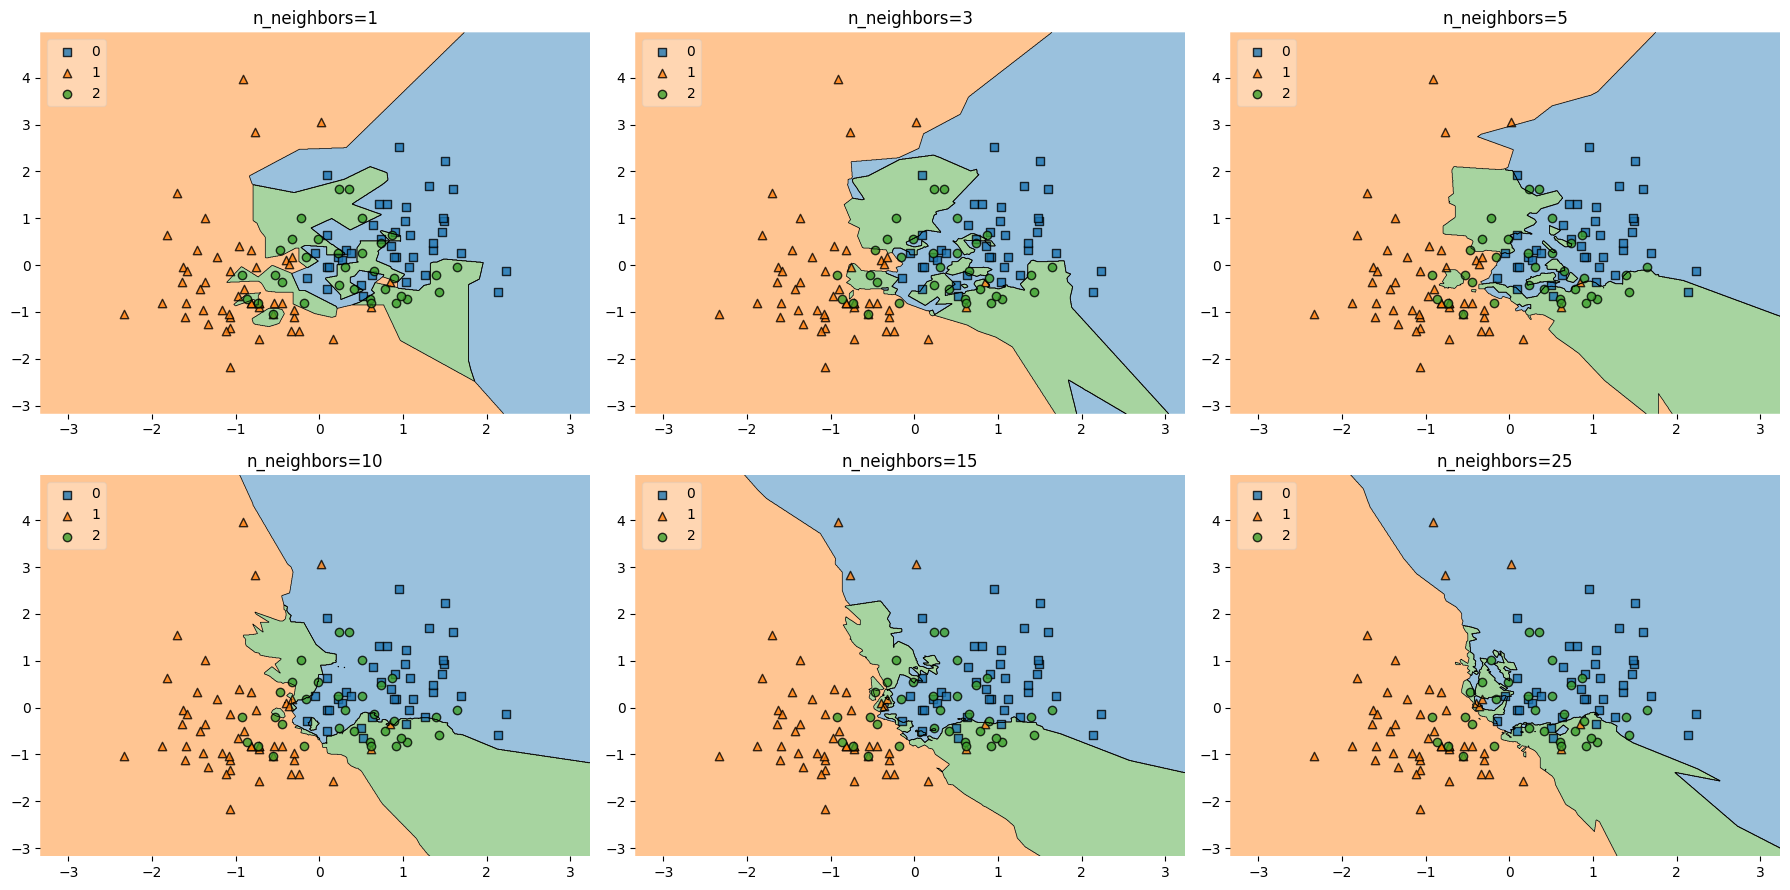

In [14]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(18,9))

labels = ['n_neighbors=1', 'n_neighbors=3', 'n_neighbors=5', 'n_neighbors=10', 'n_neighbors=15', 'n_neighbors=25']

classifiers = [KNeighborsClassifier(n_neighbors=k) for k in n_neighbors_list]
for clf, lab, grd in zip(classifiers, labels, itertools.product([0, 1], [0, 1, 2])):
    clf.fit(X_alc_mag_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_alc_mag_train, y_train, clf=clf, legend=2)
    plt.title(lab)

plt.tight_layout()
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Оптимально использовать 3 или 5 соседей, так как достигается наибольшая точность на обучении и тесте. Что касается геометрии данных, на графиках с соответственными значениями гиперпараметра наблюдается лучшее соотношение между непредвзятостью к выбросам и выявлением основных закономерностей
<br>

О переобучении модели говорит результат, полученный в случае когда k = 1 - высокая точность на тренировочной выборке и ее значительная разность с точностью на тестовой. Это связано с тем, что при малом числе соседей модель становится очень чувствительна к выбросам

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

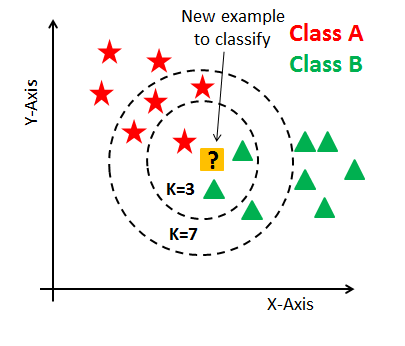

In [159]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = np.array([])
        for x in X:
            distances = self.count_distance(x, self.X_train)
            knn_indices = np.argsort(distances)[:self.k]
            knn_labels = self.y_train[knn_indices]
            label = Counter(knn_labels).most_common(1)[0][0]
            predictions = np.append(predictions, label)
        return predictions

    def count_distance(self, x, X_train):
        distances = np.sqrt(np.sum((X_train - x) ** 2, axis=1))
        return distances

In [157]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [161]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [18]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2024/homeworks/hw04_knn_linreg/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [19]:
data.isna().any().any()

False

Пропущенных значений нет

Бессмысленный столбец - Unnamed: 0

In [20]:
data.drop(columns=['Unnamed: 0'], inplace=True)

**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [21]:
data.corr(numeric_only=True).sort_values(by='price', ascending=False)

,carat,depth,table,price,x,y,z
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924


Вес и размеры бриллианта коррелируют с целевой переменной больше всего

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [170]:
data_ohe = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])
X = data_ohe.drop(columns=['price'])
X

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,3.89,3.84,2.31,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,4.34,4.35,2.75,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,5.69,5.75,3.61,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,5.66,5.68,3.56,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,6.15,6.12,3.74,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [171]:
y = data['price']
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

Параметр stratify использовать не нужно, так как целевая переменная некатегориальная

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [173]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
y_test_pred = lr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Train MSE: 1284898.1590280146
Test MSE: 1259667.5266139377


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [175]:
# All coefs

coefs = pd.DataFrame({'Coef' : lr.coef_}, index=X.columns)
coefs

,Coef
carat,5.273779e+03
depth,-9.584795e+01
table,-6.719608e+01
x,-1.057497e+03
y,1.248331e+00
z,-3.732084e+01
cut_Fair,-5.952162e+14
cut_Good,-1.006064e+15
cut_Ideal,-1.712532e+15
cut_Premium,-1.522510e+15


In [176]:
# Float variable coefs

float_variables = data.select_dtypes(include='float').columns
float_var_coefs = coefs.loc[float_variables]
float_var_coefs.reindex(float_var_coefs['Coef'].abs().sort_values(ascending=False).index)

,Coef
carat,5273.779080
x,-1057.496915
depth,-95.847948
table,-67.196082
z,-37.320838
y,1.248331


Оценки коэффициентов веса и длины бриллианта по модулю на порядок превышают оценки прочих вещественных переменных

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [177]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
lasso_coefs = pd.DataFrame({'Coef' : lasso.coef_}, index=X.columns)
lasso_coefs

,Coef
carat,4817.915546
depth,-61.329361
table,-52.851035
x,-603.828875
y,-0.000000
z,-49.861981
cut_Fair,-119.355064
cut_Good,-43.878242
cut_Ideal,42.048772
cut_Premium,0.000000


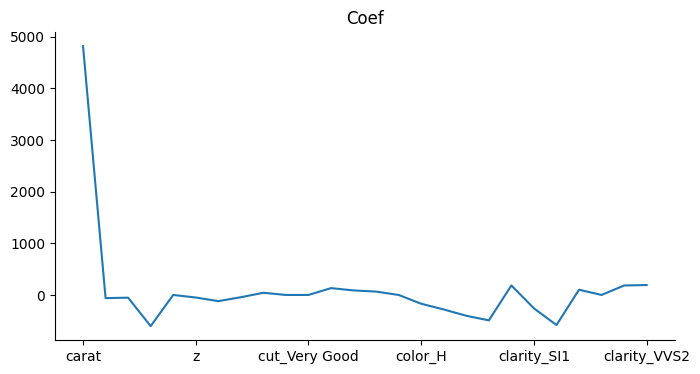

In [178]:
# @title Coef

from matplotlib import pyplot as plt
lasso_coefs['Coef'].plot(kind='line', figsize=(8, 4), title='Coef')
plt.gca().spines[['top', 'right']].set_visible(False)

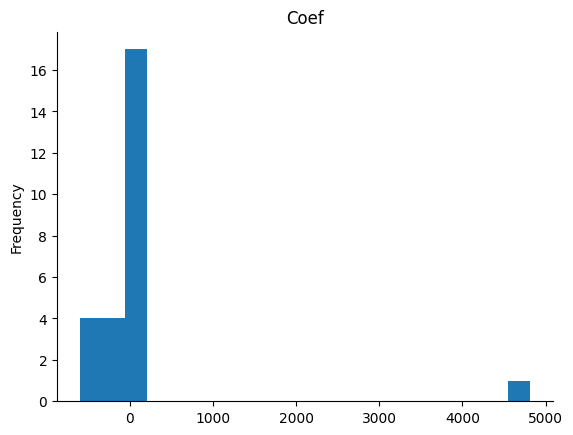

In [179]:
# @title Coef

from matplotlib import pyplot as plt
lasso_coefs['Coef'].plot(kind='hist', bins=20, title='Coef')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [180]:
float_variables = data.select_dtypes(include='float').columns
float_var_coefs = lasso_coefs.loc[float_variables]
float_var_coefs.reindex(float_var_coefs['Coef'].abs().sort_values(ascending=False).index)

,Coef
carat,4817.915546
x,-603.828875
depth,-61.329361
table,-52.851035
z,-49.861981
y,-0.000000


In [181]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(X_train, y_train)
ridge_coefs = pd.DataFrame({'Coef' : ridge.coef_}, index=X.columns)
ridge_coefs

,Coef
carat,5241.743116
depth,-91.798155
table,-65.353752
x,-1008.685454
y,-4.878163
z,-44.356994
cut_Fair,-117.904180
cut_Good,-43.019176
cut_Ideal,51.433948
cut_Premium,13.493315


In [182]:
float_variables = data.select_dtypes(include='float').columns
float_var_coefs = ridge_coefs.loc[float_variables]
float_var_coefs.reindex(float_var_coefs['Coef'].abs().sort_values(ascending=False).index)

,Coef
carat,5241.743116
x,-1008.685454
depth,-91.798155
table,-65.353752
z,-44.356994
y,-4.878163


Проблема мультиколлинеарности в изначальной регрессии проявлялась слабо для вещественных признаков и сильно для категориальных

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.542e+08, tolerance: 6.008e+07
  model = cd_fast.enet_coordinate_descent(


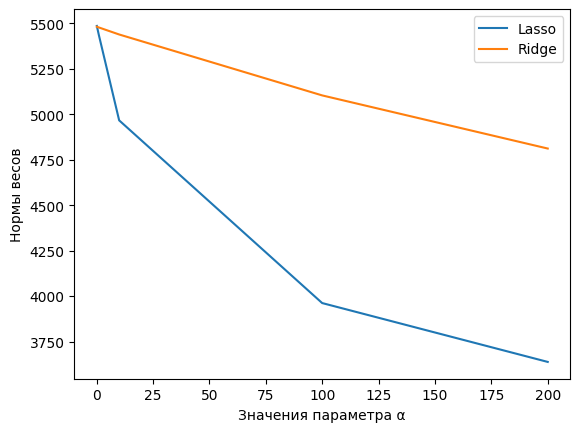

In [183]:
alphas = [0.1, 1, 10, 100, 200]
lasso_norms = []
ridge_norms = []

for alpha in alphas:
    lasso_ = Lasso(alpha=alpha)
    lasso_.fit(X_train, y_train)
    lasso_norms.append(np.linalg.norm(lasso_.coef_))

    ridge_ = Ridge(alpha=alpha)
    ridge_.fit(X_train, y_train)
    ridge_norms.append(np.linalg.norm(ridge_.coef_))

plt.plot(alphas, lasso_norms, label='Lasso')
plt.plot(alphas, ridge_norms, label='Ridge')
plt.xlabel('Значения параметра α')
plt.ylabel('Нормы весов')
plt.legend()
plt.show()

Метод Lasso более агрессивно влияет на норму весов

Lasso-регрессию часто используют для отбора признаков, так как она способна обнулять коэффициенты весов некоторых признаков, делая их неважными для модели

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [184]:
from sklearn.linear_model import LassoCV

alphas = [0.1, 1, 10, 100, 200]
lasso_cv = LassoCV(cv=5, alphas=alphas)

lasso_cv.fit(X_train, y_train)

df_mse = pd.DataFrame(lasso_cv.mse_path_, index=lasso_cv.alphas_)
df_mse

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1118783727.8002472, tolerance: 48309472.87280814
  model = cd_fast.enet_coordinate_descent_gram(


,0,1,2,3,4
200.0,2.063452e+06,1.877238e+06,2.029277e+06,1.867988e+06,1.923369e+06
100.0,1.621348e+06,1.477248e+06,1.587424e+06,1.476118e+06,1.512491e+06
10.0,1.381955e+06,1.252119e+06,1.338701e+06,1.234485e+06,1.284991e+06
1.0,1.377331e+06,1.241502e+06,1.333991e+06,1.213734e+06,1.272374e+06
0.1,1.377752e+06,1.241567e+06,1.334549e+06,1.239098e+06,1.271942e+06


In [185]:
df_mse_mean = df_mse.mean(axis=1)
df_mse_mean

200.0    1.952265e+06
100.0    1.534926e+06
10.0     1.298450e+06
1.0      1.287786e+06
0.1      1.292982e+06
dtype: float64

In [186]:
f'Best alpha: {df_mse_mean.idxmin()}'

'Best alpha: 1.0'

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [187]:
lasso_final = Lasso(alpha=1)
lasso_final.fit(X_train, y_train)
lasso_final_coefs = pd.DataFrame({'Coef' : lasso_final.coef_}, index=X.columns)
lasso_final_coefs.reindex(lasso_final_coefs['Coef'].abs().sort_values(ascending=False).index)

,Coef
carat,5232.474964
x,-1006.946017
clarity_SI2,-589.911875
clarity_I1,-503.683757
color_J,-416.555269
color_I,-293.373355
clarity_SI1,-258.265288
clarity_VVS2,198.267374
clarity_IF,189.865432
clarity_VVS1,187.965486


Наиболее информативными оказались признаки carat, x и тд. Неинформативными оказались признаки, чьи значения коэффициентов равны или близки к 0. Данные результаты связаны с тем, что вес и длина бриллианта задают его основную стоимость. Также информативным является то, что на ценообразование по категориальным признакам, самое большее влияние оказывают "крайние" значения показателей, в частности  указывающие на низкое качество (плохие cut и clarity) или наименьшую популярность (плохой color), в то время как серединные значения категориальных признаков игнорируются

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [188]:
lasso_final = Lasso(alpha=1)
lasso_final.fit(X_train, y_train)
y_pred = lasso_final.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression MSE: {test_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')

Linear Regression MSE: 1259667.5266139377
Lasso Regression MSE: 1260161.249152463


Обе модели показывают похожее качество. L1-регуляризация не повысила качество модели, возможно в связи со слабой мультиколлинеарностью признаков или из-за того, что почти все признаки значимы для вычисления целевой переменной